Создайте новую колонку, которая выражает отношение атаки к
защите для всех юнитов, и постройте график для анализа этого

In [113]:
import pandas as pd

       name  attack_infantry  attack_cavalry  attack_ranged  defense_infantry  \
0  Infantry                5               3              2                 4   
1   Cavalry                6               5              2                 3   
2   Archers                2               1              5                 1   

   defense_cavalry  defense_ranged     ratio  
0                2               3  1.111111  
1                4               1  1.625000  
2                1               4  1.333333  


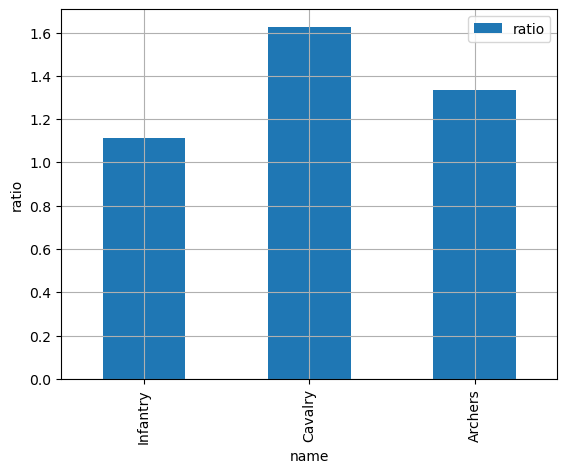

In [114]:
df = pd.read_csv('unit_characteristics.csv')
attack = ['attack_infantry', 'attack_cavalry', 'attack_ranged']
defense = ['defense_infantry', 'defense_cavalry', 'defense_ranged']
df['ratio'] = df[attack].sum(axis=1) / df[defense].sum(axis=1)
print(df)
df.plot(kind='bar', xlabel='name', ylabel='ratio', x='name', y='ratio', grid=True);

In [115]:
min_ratio = df[df['ratio'] > 1]['ratio'].min()
print(df.loc[df['ratio'] == min_ratio])

       name  attack_infantry  attack_cavalry  attack_ranged  defense_infantry  \
0  Infantry                5               3              2                 4   

   defense_cavalry  defense_ranged     ratio  
0                2               3  1.111111  


Используйте pandas для построения графика, отображающего атаку и защиту юнитов (например, столбчатую диаграмму или иную другую).

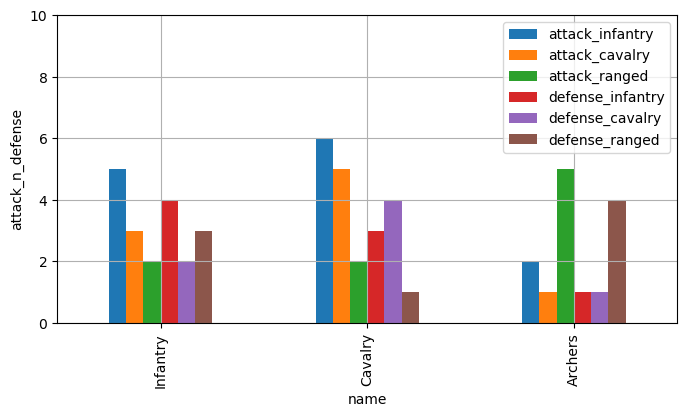

In [116]:
new_df = pd.read_csv('unit_characteristics.csv')
new_df.plot(kind='bar', x='name', xlabel='name', ylabel='attack_n_defense', ylim=(0, 10), figsize=(8, 4), grid=True);

Вывести самого успешного игрока.

In [117]:
battle_results = pd.read_csv('battle_results.csv')
player_wins = battle_results[battle_results['battle_result'] == 'player_win']
print(player_wins.head())


    id_player                                        player_army  \
7    Player_2         archer, archer, infantry, cavalry, cavalry   
8   Player_37  mounted archer, infantry, infantry, infantry, ...   
10  Player_25                                  infantry, cavalry   
16  Player_35  cavalry, cavalry, infantry, mounted archer, mo...   
23  Player_10  archer, infantry, infantry, infantry, cavalry,...   

                                             bot_army battle_result  \
7   archer, cavalry, archer, mounted archer, infan...    player_win   
8   archer, cavalry, cavalry, archer, archer, cava...    player_win   
10  archer, archer, cavalry, infantry, archer, cav...    player_win   
16  mounted archer, archer, infantry, mounted arch...    player_win   
23  cavalry, cavalry, archer, mounted archer, cava...    player_win   

          date  
7   2023-10-29  
8   2023-10-12  
10  2023-10-22  
16  2023-10-23  
23  2023-10-15  


In [118]:
win_cnt = player_wins['id_player'].value_counts()
print(win_cnt.head())

id_player
Player_24    383
Player_23    362
Player_18    359
Player_28    359
Player_14    358
Name: count, dtype: int64


In [119]:
most_successful_player = win_cnt.idxmax()
print(f"The most successful player: {most_successful_player}")

The most successful player: Player_24


Найдите все битвы, в которых участвуют юниты, у которых атака по
коннице больше 4 и защита по коннице больше 3, и выведите список
этих битв.

In [120]:

battles = pd.read_csv("battle_results.csv")
units = pd.read_csv("unit_characteristics.csv")

filtered_units = units[(units["attack_cavalry"] > 4) & (units["defense_cavalry"] > 3)]["name"].to_list()
print(filtered_units)


['Cavalry']


In [121]:
def contains_filtered_units(army):
    for unit in filtered_units:
        if unit.lower() in army:
            return True
    return False

battles_with_filtered_units = battles[(battles["player_army"].apply(contains_filtered_units)) | (battles["bot_army"].apply(contains_filtered_units))]

print(battles_with_filtered_units.head())

   id_player                                        player_army  \
0  Player_12  infantry, mounted archer, cavalry, archer, cav...   
1  Player_21  mounted archer, infantry, mounted archer, infa...   
2   Player_2  mounted archer, cavalry, infantry, archer, arc...   
3   Player_8  mounted archer, mounted archer, cavalry, arche...   
4  Player_42  archer, cavalry, infantry, archer, cavalry, ar...   

                                            bot_army battle_result        date  
0  mounted archer, infantry, mounted archer, arch...       bot_win  2023-10-17  
1  mounted archer, mounted archer, infantry, cava...       bot_win  2023-10-20  
2  infantry, archer, mounted archer, cavalry, cav...          draw  2023-10-03  
3  archer, infantry, infantry, infantry, infantry...       bot_win  2023-10-23  
4  cavalry, infantry, infantry, cavalry, mounted ...       bot_win  2023-10-08  
